In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [1]:
!pip install tensorflow==1.8.0

     |████████████████████████████████| 49.1MB 83kB/s 
     |████████████████████████████████| 3.1MB 44.3MB/s 
     |████████████████████████████████| 890kB 42.8MB/s 
  Created wheel for html5lib: filename=html5lib-0.9999999-cp36-none-any.whl size=107220 sha256=288934474b90f7bcd616a78c80904fd7c496fb452d7517e8c0539ff910b0d412
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built html5lib
  Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Found existing installation: bleach 3.2.1
    Uninstalling bleach-3.2.1:
      Successfully uninstalled bleach-3.2.1
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


In [3]:
data = pd.read_csv('passenger.csv')
data

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0
1,2,Estonia,LEA,AALISTE,F,22,C,0
2,3,Estonia,AIRI,AAVASTE,F,21,C,0
3,4,Sweden,JURI,AAVIK,M,53,C,0
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0
...,...,...,...,...,...,...,...,...
984,985,Sweden,ANNA INGRID BIRGITTA,OSTROM,F,60,P,0
985,986,Sweden,ELMAR MIKAEL,OUN,M,34,P,1
986,987,Sweden,ENN,QUNAPUU,M,77,P,0
987,988,Sweden,LY,GUNAPUU,F,87,P,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  989 non-null    int64 
 1   Country      989 non-null    object
 2   Firstname    989 non-null    object
 3   Lastname     989 non-null    object
 4   Sex          989 non-null    object
 5   Age          989 non-null    int64 
 6   Category     989 non-null    object
 7   Survived     989 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 61.9+ KB


In [5]:
data['Country'].value_counts()

Sweden           550
Estonia          344
Latvia            28
Finland           16
Russia            14
Norway             9
Germany            8
Denmark            6
Lithuania          4
Great Britain      2
Morocco            2
Netherlands        2
France             1
Belarus            1
Nigeria            1
Canada             1
Name: Country, dtype: int64

In [6]:
data['Lastname'].value_counts()

ANDERSSON     15
NILSSON       12
ERIKSSON      11
KARLSSON       9
JOHANSSON      9
              ..
LINDGREN       1
BERNERVALL     1
PALGUNOV       1
NORDQVIST      1
TAMMES         1
Name: Lastname, Length: 774, dtype: int64

In [7]:
data['Category'].value_counts()

P    796
C    193
Name: Category, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc5be84c4e0>,
      dtype=object)

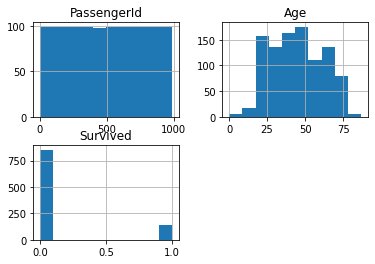

In [8]:
data.hist()

In [9]:
data_copy = data.copy()
data_copy

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0
1,2,Estonia,LEA,AALISTE,F,22,C,0
2,3,Estonia,AIRI,AAVASTE,F,21,C,0
3,4,Sweden,JURI,AAVIK,M,53,C,0
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0
...,...,...,...,...,...,...,...,...
984,985,Sweden,ANNA INGRID BIRGITTA,OSTROM,F,60,P,0
985,986,Sweden,ELMAR MIKAEL,OUN,M,34,P,1
986,987,Sweden,ENN,QUNAPUU,M,77,P,0
987,988,Sweden,LY,GUNAPUU,F,87,P,0


In [10]:
del data_copy['Lastname']

In [11]:
del data_copy['Firstname']

In [12]:
data_copy

,PassengerId,Country,Sex,Age,Category,Survived
0,1,Sweden,M,62,P,0
1,2,Estonia,F,22,C,0
2,3,Estonia,F,21,C,0
3,4,Sweden,M,53,C,0
4,5,Sweden,F,55,P,0
...,...,...,...,...,...,...
984,985,Sweden,F,60,P,0
985,986,Sweden,M,34,P,1
986,987,Sweden,M,77,P,0
987,988,Sweden,F,87,P,0


In [13]:
data_copy['male'] = data_copy['Sex'][data_copy['Sex'] == 'M']
data_copy['female'] = data_copy['Sex'][data_copy['Sex'] == 'F']

In [14]:
data_copy

,PassengerId,Country,Sex,Age,Category,Survived,male,female
0,1,Sweden,M,62,P,0,M,NaN
1,2,Estonia,F,22,C,0,NaN,F
2,3,Estonia,F,21,C,0,NaN,F
3,4,Sweden,M,53,C,0,M,NaN
4,5,Sweden,F,55,P,0,NaN,F
...,...,...,...,...,...,...,...,...
984,985,Sweden,F,60,P,0,NaN,F
985,986,Sweden,M,34,P,1,M,NaN
986,987,Sweden,M,77,P,0,M,NaN
987,988,Sweden,F,87,P,0,NaN,F


In [15]:
for i in range(len(data_copy['male'])):
  if data_copy['male'][i] == 'M':
    data_copy['male'][i] = 1
  else :
    data_copy['male'][i] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [16]:
data_copy

,PassengerId,Country,Sex,Age,Category,Survived,male,female
0,1,Sweden,M,62,P,0,1,NaN
1,2,Estonia,F,22,C,0,0,F
2,3,Estonia,F,21,C,0,0,F
3,4,Sweden,M,53,C,0,1,NaN
4,5,Sweden,F,55,P,0,0,F
...,...,...,...,...,...,...,...,...
984,985,Sweden,F,60,P,0,0,F
985,986,Sweden,M,34,P,1,1,NaN
986,987,Sweden,M,77,P,0,1,NaN
987,988,Sweden,F,87,P,0,0,F


In [17]:
for i in range(len(data_copy['male'])):
  if data_copy['female'][i] == 'F':
    data_copy['female'][i] = 1
  else :
    data_copy['female'][i] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
data_copy

,PassengerId,Country,Sex,Age,Category,Survived,male,female
0,1,Sweden,M,62,P,0,1,0
1,2,Estonia,F,22,C,0,0,1
2,3,Estonia,F,21,C,0,0,1
3,4,Sweden,M,53,C,0,1,0
4,5,Sweden,F,55,P,0,0,1
...,...,...,...,...,...,...,...,...
984,985,Sweden,F,60,P,0,0,1
985,986,Sweden,M,34,P,1,1,0
986,987,Sweden,M,77,P,0,1,0
987,988,Sweden,F,87,P,0,0,1


In [19]:
data_copy['Category_P'] = data_copy['Category'][data_copy['Category'] == 'P']
data_copy['Category_C'] = data_copy['Category'][data_copy['Category'] == 'C']

In [20]:
for i in range(len(data_copy['Category_P'])):
  if data_copy['Category_P'][i] == 'P':
    data_copy['Category_P'][i] = 1
  else :
    data_copy['Category_P'][i] = 0
  if data_copy['Category_C'][i] == 'C':
    data_copy['Category_C'][i] = 1
  else :
    data_copy['Category_C'][i] = 0  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ""

In [21]:
data_copy

,PassengerId,Country,Sex,Age,Category,Survived,male,female,Category_P,Category_C
0,1,Sweden,M,62,P,0,1,0,1,0
1,2,Estonia,F,22,C,0,0,1,0,1
2,3,Estonia,F,21,C,0,0,1,0,1
3,4,Sweden,M,53,C,0,1,0,0,1
4,5,Sweden,F,55,P,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
984,985,Sweden,F,60,P,0,0,1,1,0
985,986,Sweden,M,34,P,1,1,0,1,0
986,987,Sweden,M,77,P,0,1,0,1,0
987,988,Sweden,F,87,P,0,0,1,1,0


In [22]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
data_encoder = cat_encoder.fit_transform(data_copy[['Country']])
data_encoder.toarray()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [39]:
train_y = cat_encoder.fit_transform(train_y)
test_y = cat_encoder.fit_transform(test_y)

In [40]:
train_y.toarray()

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [41]:
test_y.toarray()

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [23]:
data_copy['Country'] = np.argmax(data_encoder, axis=1).reshape(-1,1)

In [24]:
data_copy

,PassengerId,Country,Sex,Age,Category,Survived,male,female,Category_P,Category_C
0,1,15,M,62,P,0,1,0,1,0
1,2,3,F,22,C,0,0,1,0,1
2,3,3,F,21,C,0,0,1,0,1
3,4,15,M,53,C,0,1,0,0,1
4,5,15,F,55,P,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
984,985,15,F,60,P,0,0,1,1,0
985,986,15,M,34,P,1,1,0,1,0
986,987,15,M,77,P,0,1,0,1,0
987,988,15,F,87,P,0,0,1,1,0


In [25]:
del data_copy['Sex']
del data_copy['Category']

In [26]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  989 non-null    int64 
 1   Country      989 non-null    int64 
 2   Age          989 non-null    int64 
 3   Survived     989 non-null    int64 
 4   male         989 non-null    object
 5   female       989 non-null    object
 6   Category_P   989 non-null    object
 7   Category_C   989 non-null    object
dtypes: int64(4), object(4)
memory usage: 61.9+ KB


In [27]:
data_copy['male'] = data_copy['male'].astype(np.int64)
data_copy['female'] = data_copy['female'].astype(np.int64)
data_copy['Category_P'] = data_copy['Category_P'].astype(np.int64)
data_copy['Category_C'] = data_copy['Category_C'].astype(np.int64)

In [28]:
data_copy = data_copy.astype(float)

In [29]:
data_corr = data_copy.corr()
data_corr

,PassengerId,Country,Age,Survived,male,female,Category_P,Category_C
PassengerId,1.000000,-0.130930,-0.073684,0.036620,0.064499,-0.064499,-0.108356,0.108356
Country,-0.130930,1.000000,0.510668,-0.143153,-0.079219,0.079219,0.501571,-0.501571
Age,-0.073684,0.510668,1.000000,-0.245832,-0.053819,0.053819,0.325096,-0.325096
Survived,0.036620,-0.143153,-0.245832,1.000000,0.236082,-0.236082,-0.090583,0.090583
male,0.064499,-0.079219,-0.053819,0.236082,1.000000,-1.000000,0.072258,-0.072258
female,-0.064499,0.079219,0.053819,-0.236082,-1.000000,1.000000,-0.072258,0.072258
Category_P,-0.108356,0.501571,0.325096,-0.090583,0.072258,-0.072258,1.000000,-1.000000
Category_C,0.108356,-0.501571,-0.325096,0.090583,-0.072258,0.072258,-1.000000,1.000000


In [30]:
data_copy.isnull().sum()

PassengerId    0
Country        0
Age            0
Survived       0
male           0
female         0
Category_P     0
Category_C     0
dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data_copy, test_size = 0.2)

train_y = train_set['Survived']
del train_set['Survived']

test_y = test_set['Survived']
del test_set['Survived']

In [32]:
train_set.shape

(791, 7)

In [76]:
s = train_y.toarray()

In [74]:
a = test_y.toarray()

In [75]:
a

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [64]:
train_set = np.array(train_set).astype(np.float32)

In [65]:
test_set = np.array(test_set).astype(np.float32)

In [59]:
import tensorflow as tf

X = tf.placeholder(tf.float32,shape=[None,7])
Y = tf.placeholder(tf.float32,shape=[None,2])

In [82]:
L1 = tf.Variable(tf.random_normal([7,32],stddev=0.01))
L1 = tf.layers.batch_normalization(L1, center=True, scale=True)
W1 = tf.nn.relu(tf.matmul(X,L1))

L2 = tf.Variable(tf.random_normal([32,64],stddev=0.01))
L2 = tf.layers.batch_normalization(L2, center=True, scale=True)
W2 = tf.nn.relu(tf.matmul(W1,L2))

L3 = tf.Variable(tf.random_normal([64,128],stddev=0.01))
L3 = tf.layers.batch_normalization(L3, center=True, scale=True)
W3 = tf.nn.relu(tf.matmul(W2,L3))

L4 = tf.Variable(tf.random_normal([128,64],stddev=0.01))
L4 = tf.layers.batch_normalization(L4, center=True, scale=True)
W4 = tf.nn.relu(tf.matmul(W3,L4))

L5 = tf.Variable(tf.random_normal([64,32],stddev=0.01))
L5 = tf.layers.batch_normalization(L5, center=True, scale=True)
W5 = tf.nn.relu(tf.matmul(W4,L5))

L6 = tf.Variable(tf.random_normal([32,16],stddev=0.01))
L6 = tf.layers.batch_normalization(L6, center=True, scale=True)
W6 = tf.nn.relu(tf.matmul(W5,L6))

L7 = tf.Variable(tf.random_normal([16,2],stddev=0.01))
model = tf.matmul(W6,L7)

In [83]:

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(cost)

In [84]:

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
for step in range(30000):
    _, cost_val = sess.run([optimizer, cost], feed_dict={X: train_set, Y: s})
    if step % 1000 == 0:
      print(step, "Cost: ", cost_val)
prediction = sess.run(model,feed_dict={X:test_set})
prediction2 = sess.run(model,feed_dict={X:train_set})
print('최적화 완료!')

0 Cost:  0.6931466
1000 Cost:  0.3463845
2000 Cost:  0.31014144
3000 Cost:  0.29119948
4000 Cost:  0.2557847
5000 Cost:  0.21646051
6000 Cost:  0.1879011
7000 Cost:  0.24266325
8000 Cost:  0.21781923
9000 Cost:  0.19002485
10000 Cost:  0.24346255
11000 Cost:  0.17121544
12000 Cost:  0.18849528
13000 Cost:  0.22530347
14000 Cost:  0.14915343
15000 Cost:  0.16688609
16000 Cost:  0.176257
17000 Cost:  0.1953894
18000 Cost:  0.1558902
19000 Cost:  0.18054114
20000 Cost:  0.14494501
21000 Cost:  0.16891298
22000 Cost:  0.2917647
23000 Cost:  0.2421226
24000 Cost:  0.21975365
25000 Cost:  0.20145874
26000 Cost:  0.18415976
27000 Cost:  0.18668126
28000 Cost:  0.17842546
29000 Cost:  0.19743812
최적화 완료!


In [85]:
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('훈련 정확도:', sess.run(accuracy,
                        feed_dict={X: test_set,
                                   Y: a}))
print('테스트 정확도:', sess.run(accuracy,
                        feed_dict={X: train_set,
                                   Y: s}))
sess.close()

훈련 정확도: 0.85353535
테스트 정확도: 0.863464
